
<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Sesiones/Laboratorio_redes_neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Jesus David Serpa P

# Laboratorio redes neuronales convolucionales

Objetivo: Implementar un red neuronal LeNet5 empleando keras e implementar una red neuronal  VGG.  




1. Importar las librerias:




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from tensorflow import keras


2. Cargar los datos de entrenamiento y test
```python
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
```

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_test :", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape X_train: (60000, 28, 28)
Shape y_train: (60000,)
Shape X_test : (10000, 28, 28)
Shape y_test : (10000,)



3. Normalizar los datos.


In [3]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn  = np.expand_dims(X_test, axis=-1)

print("Shape X_train_cnn:", X_train_cnn.shape)
print("Shape X_test_cnn :", X_test_cnn.shape)

Shape X_train_cnn: (60000, 28, 28, 1)
Shape X_test_cnn : (10000, 28, 28, 1)


  
4. Realizar una visualización de 20 imagenes aproximadamente, puede emplear el comando imshow con cmap= binary

```python
  ax.imshow(X_train[i],cmap='binary')
```

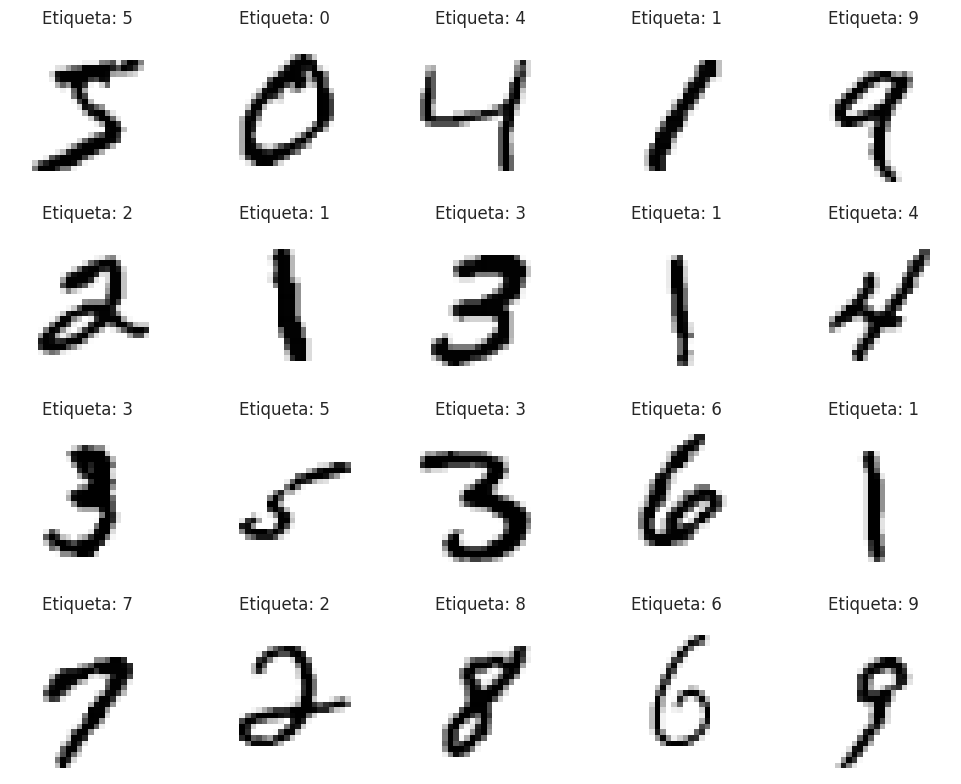

In [4]:
num_images = 20

fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # 4x5 = 20 imágenes

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    ax.set_title(f"Etiqueta: {y_train[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()



5. Implementar en keras, la red Letnet5, la arquitectura de la red es la siguiente:

![img](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/convolution_img/LeNet5.png?raw=true)


Par la implementación, se recomienda construir un modelo secuencial.


```python
keras.backend.clear_session()
models=keras.models.Sequential([...])

```

algunos parámetros que pueden ser pasados dentro de los tres puntos anteriores son:


```python
keras.layers.MaxPool2D,
keras.layers.Conv2D,
keras.layers.Flatten,
keras.layers.Dense
```

Revisa la documentación para pasar los valores adecuados.


In [5]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models

K.clear_session()

model_lenet = models.Sequential([
    # Entrada 32x32x1
    layers.Input(shape=(32, 32, 1)),

    # Capa C1: conv 5x5, 6 filtros → 28x28x6
    layers.Conv2D(filters=6,
                  kernel_size=(5, 5),
                  activation='tanh',
                  padding='valid'),

    # S2: avg pool 2x2 → 14x14x6
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),

    # C3: conv 5x5, 16 filtros → 10x10x16
    layers.Conv2D(filters=16,
                  kernel_size=(5, 5),
                  activation='tanh',
                  padding='valid'),

    # S4: avg pool 2x2 → 5x5x16
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),

    # Flatten → 400
    layers.Flatten(),

    # FC1: 120
    layers.Dense(120, activation='tanh'),

    # FC2: 84
    layers.Dense(84, activation='tanh'),

    # Capa de salida: 10 clases (softmax)
    layers.Dense(10, activation='softmax')
])

model_lenet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
X_train_lenet = np.pad(X_train_cnn, ((0,0),(2,2),(2,2),(0,0)), mode='constant')
X_test_lenet  = np.pad(X_test_cnn,  ((0,0),(2,2),(2,2),(0,0)), mode='constant')

print(X_train_lenet.shape)
print(X_test_lenet.shape)


(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [7]:
history = model_lenet.fit(
    X_train_lenet, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_test_lenet, y_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - accuracy: 0.8249 - loss: 0.6070 - val_accuracy: 0.9587 - val_loss: 0.1461
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9600 - loss: 0.1350 - val_accuracy: 0.9706 - val_loss: 0.0927
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.9762 - loss: 0.0774 - val_accuracy: 0.9782 - val_loss: 0.0650
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9831 - loss: 0.0601 - val_accuracy: 0.9818 - val_loss: 0.0559
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9828 - val_loss: 0.0499
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9888 - loss: 0.0353 - val_accuracy: 0.9809 - val_loss: 0.0568
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9858 - val_loss: 0.0442
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9930 - loss: 0.0234 - 


6. Revisa el modelo que acabaste de construir.
```python
model.summary()
```


In [8]:
model_lenet.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)



7. Vamos a utlizar un optimizador de Adams,  El optimizador de Adam (Adaptive Moment Estimation) combina las ventajas de los algoritmos RMSProp y Momentum para mejorar el proceso de aprendizaje de un modelo. Al igual que Momentum, Adam utiliza una estimación del momento y de la magnitud de los gradientes  para actualizar los parámetros del modelo en cada iteración. Sin embargo, en lugar de utilizar una tasa de aprendizaje constante para todos los parámetros, Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente. Esto permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento, lo que puede llevar a una mayor precisión de la predicción en comparación con otros métodos de optimización.


El optimizador de Adam es un algoritmo de optimización basado en gradientes de primer orden que utiliza estimaciones adaptativas de momentos de primer y segundo orden. El algoritmo se puede describir de la siguiente forma :

$$
\begin{aligned}
& \text{Inicializar:} \quad \theta_0, \alpha, \beta_1, \beta_2, \epsilon \\
& \text{Para cada iteración } t = 1, 2, \dots \\
& \quad \text{Obtener el gradiente:} \quad g_t = \nabla_\theta J(\theta_{t-1}) \\
& \quad \text{Actualizar los momentos de primer orden:} \quad m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
& \quad \text{Actualizar los momentos de segundo orden:} \quad v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
& \quad \text{Corregir el sesgo de los momentos de primer orden:} \quad \hat{m}_t = \frac{m_t}{1 - \beta_1^t} \\
& \quad \text{Corregir el sesgo de los momentos de segundo orden:} \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
& \quad \text{Actualizar los parámetros:} \quad \theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
\end{aligned}
$$

Donde $\theta$ son los parámetros del modelo, $\alpha$ es la tasa de aprendizaje, $\beta_1$ y $\beta_2$ son los factores de decaimiento de los momentos, $\epsilon$ es un término de suavizado para evitar la división por cero, $J$ es la función objetivo, $g_t$ es el gradiente en la iteración $t$, $m_t$ y $v_t$ son los momentos de primer y segundo orden respectivamente, y $\hat{m}_t$ y $\hat{v}_t$ son las correcciones de sesgo de los momentos.




emplea el siguiente compilador del modelo
```python
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 ```


In [9]:
model_lenet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)




 8. Realiza el fit del modelo, emplea GPU, para ello cambia la configuración de collaboratory para que tu modelo se ejecute un poco mas rápido.


 ```python
 history = model.fit(X_train,y_train,epochs=10,validation_split=0.3)
```


- Loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de entrenamiento. Es una función que se quiere minimizar durante el entrenamiento. Un valor bajo de loss indica que el modelo se ajusta bien a los datos de entrenamiento.
- Accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de entrenamiento. Es una métrica que se quiere maximizar durante el entrenamiento. Un valor alto de accuracy indica que el modelo clasifica bien los datos de entrenamiento.
- Val_loss: es la medida del error que comete el modelo al predecir las etiquetas de los datos de validación. Los datos de validación son un subconjunto de los datos de entrenamiento que se reservan para evaluar el rendimiento del modelo durante el entrenamiento. Un valor bajo de val_loss indica que el modelo se generaliza bien a los datos de validación.
- Val_accuracy: es la medida del porcentaje de predicciones correctas que hace el modelo sobre los datos de validación. Un valor alto de val_accuracy indica que el modelo clasifica bien los datos de validación.


In [10]:
history = model_lenet.fit(
    X_train_lenet,
    y_train,
    epochs=10,
    validation_split=0.3,
    batch_size=128,
    verbose=1
)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9955 - loss: 0.0163 - val_accuracy: 0.9931 - val_loss: 0.0214
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9973 - loss: 0.0097 - val_accuracy: 0.9936 - val_loss: 0.0210
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.9982 - loss: 0.0074 - val_accuracy: 0.9929 - val_loss: 0.0216
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9930 - val_loss: 0.0220
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.9936 - val_loss: 0.0212
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.9985 - loss: 0.0055 - val_accuracy: 0.9932 - val_loss: 0.0221
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9927 - val_loss: 0.0223
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9998 - loss: 0.0018 - 



9. Realiza la predicción:
```python
q=model.predict(X_test)
```


In [12]:
q = model_lenet.predict(X_test_lenet)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step



10. Muestra los valores de q y determina que numero se esta prediciendo.


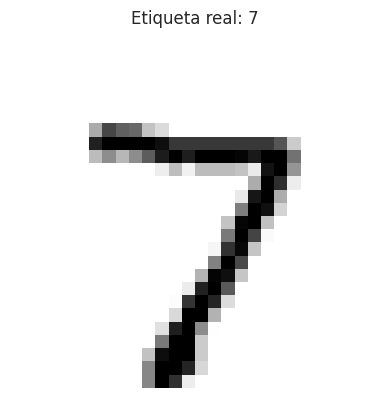

Vector de probabilidades q[i]:
[2.5129239e-09 6.4206945e-10 8.2073113e-09 5.3594700e-08 4.1298540e-10
 1.7729651e-10 1.5849080e-13 9.9999994e-01 4.9569164e-12 1.7686732e-09]
Número predicho por la red: 7


In [13]:
i = 0

# Mostrar la imagen original
plt.imshow(X_test[i], cmap='binary')
plt.title(f"Etiqueta real: {y_test[i]}")
plt.axis('off')
plt.show()

# Mostrar el vector de probabilidades q[i]
print("Vector de probabilidades q[i]:")
print(q[i])

# Número predicho (el índice de la probabilidad máxima)
prediccion = np.argmax(q[i])
print("Número predicho por la red:", prediccion)



11. Puede graficar la convergencia del modelo


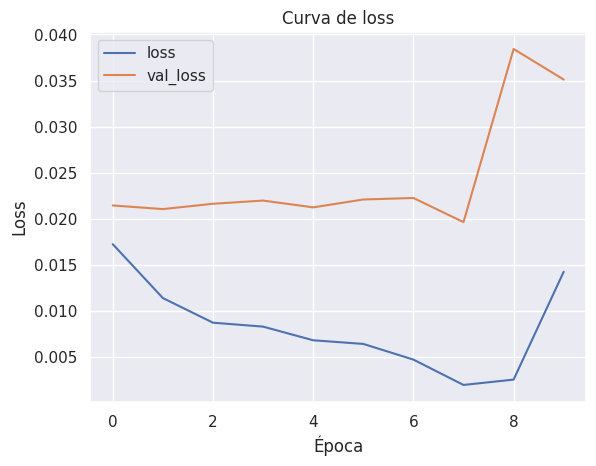

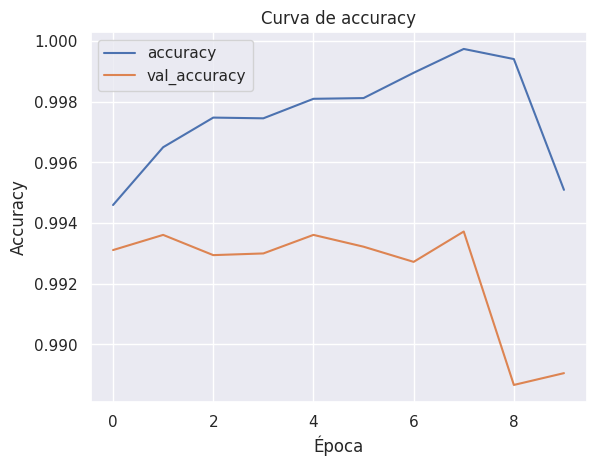

In [16]:
import matplotlib.pyplot as plt

# Graficar la curva de loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Curva de loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar la curva de accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Curva de accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


12. Una forma alterna de implementar el modelo puede ser dada de la siguiente forma:



```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

```

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Reacomodar los datos para que tengan canal (28x28x1)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test  = X_test.reshape(10000, 28, 28, 1)

input_shape = (28, 28, 1)

# Modelo alterno (tipo LeNet simplificado)
model_alt = Sequential()
model_alt.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
model_alt.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# model_alt.add(Dropout(0.25))

model_alt.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu'))
model_alt.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# model_alt.add(Dropout(0.25))

model_alt.add(Flatten())
model_alt.add(Dense(256, activation='relu'))
model_alt.add(Dense(84, activation='relu'))
model_alt.add(Dense(10, activation='softmax'))

# modelo alterno con Adam
model_alt.compile(
    optimizer=Adam(),
    loss=sparse_categorical_crossentropy,
    metrics=['accuracy']
)


model_alt.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,802 (354.70 KB)

 Trainable params: 90,802 (354.70 KB)

 Non-trainable params: 0 (0.00 B)




13. Emplea la arquitectura anterior para el  
  el dataset cifar100,  empleando BatchNormalization y dropout.


- BatchNormalization es una técnica que se usa para acelerar y estabilizar el entrenamiento de las redes neuronales artificiales, mediante la normalización de las entradas de cada capa, re-centrando y re-escalando los datos.

  BatchNormalization se aplica justo antes de la función de activación de cada capa, y consiste en centrar y normalizar cada mini-lote con una media y una desviación estándar calculadas con los datos del mini-lote, y luego re-escalar y desplazar los datos de nuevo con parámetros aprendidos por la red durante el entrenamiento. Estos parámetros permiten que la red se adapte a la distribución óptima de las activaciones para cada capa. Además, al introducir cierto ruido en los datos, BatchNormalization actúa como una regularización y ayuda a reducir el sobreajuste.


- El dropout es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalizar a nuevos datos. El dropout consiste en eliminar aleatoriamente algunas neuronas de la red durante el entrenamiento, lo que hace que el modelo sea más robusto y menos dependiente de ciertas conexiones. El dropout se puede interpretar como una forma de promediar varios modelos más pequeños y diferentes, lo que mejora el rendimiento final.

  El dropout se aplica a cada capa de la red, especificando una probabilidad de mantener cada neurona activa. Por ejemplo, si se usa un dropout de 0.2, significa que el 20% de las neuronas se desactivarán en cada iteración del entrenamiento. El dropout solo se usa durante el entrenamiento, no durante la inferencia o la evaluación. El dropout se puede combinar con otras técnicas de regularización, como la normalización de pesos o la normalización por lotes.




```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras


(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()


plt.imshow(train_image[30])
plt.axis('off')
```

intenta agregar, lineas como las siguientes en los lugares mas estrategicos:


```python
keras.layers.Dropout(0.2),
keras.layers.BatchNormalization()
```






14. Emplea el siguiente compilador:

El optimizador de NAdam (Nesterov-accelerated Adaptive Moment Estimation) es una variante de Adam que incorpora el método de Nesterov, que consiste en utilizar una predicción de la posición futura de los parámetros para calcular el gradiente, en lugar de la posición actual. Esto hace que el algoritmo sea más sensible a los cambios de dirección del gradiente y evite oscilaciones innecesarias. NAdam también modifica la forma de calcular el momento y la magnitud del gradiente, usando una media móvil exponencial sesgada hacia cero en lugar de una media móvil exponencial simple.


```python
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

El número de épocas que se necesita para entrenar una red neuronal depende de varios factores, como el tamaño de los datos, la complejidad del modelo, la función de pérdida, el algoritmo de optimización, la tasa de aprendizaje, etc. No hay una regla fija para elegir el número de épocas, pero se puede usar el criterio de parada temprana, que consiste en monitorear el error de validación y detener el entrenamiento cuando este empiece a aumentar, lo que indica un sobreajuste del modelo.



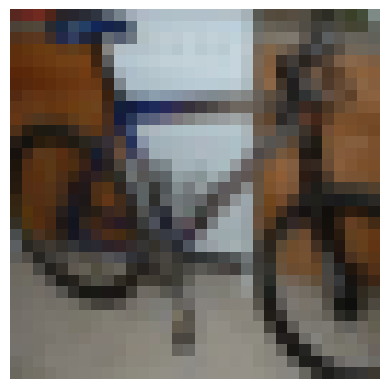

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,412 (2.46 MB)

 Trainable params: 644,452 (2.46 MB)

 Non-trainable params: 960 (3.75 KB)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)

# 1. Cargar CIFAR100
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar100.load_data()

# Ver una imagen
plt.imshow(train_image[30])
plt.axis('off')
plt.show()

# 2. Normalizar las imágenes
train_image = train_image.astype("float32") / 255.0
test_image  = test_image.astype("float32") / 255.0

input_shape = (32, 32, 3)

# 3. Arquitectura CNN + BatchNorm + Dropout
model_cifar = Sequential()

# Bloque 1
model_cifar.add(Conv2D(32, (3, 3), padding='same',
                       activation='relu', input_shape=input_shape))
model_cifar.add(BatchNormalization())
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(Dropout(0.2))

# Bloque 2
model_cifar.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cifar.add(BatchNormalization())
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(Dropout(0.3))

# Bloque 3
model_cifar.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_cifar.add(BatchNormalization())
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(Dropout(0.4))

# Clasificador final
model_cifar.add(Flatten())
model_cifar.add(Dense(256, activation='relu'))
model_cifar.add(BatchNormalization())
model_cifar.add(Dropout(0.5))
model_cifar.add(Dense(100, activation='softmax'))

model_cifar.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cifar.summary()

15. Emplea early_stooping y realiza el fit



```python
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
```

El parámetro patience=5 indica el número de épocas sin mejora después de las cuales se detendrá el entrenamiento. El parámetro restore_best_weights=True indica que se restaurarán los pesos del modelo desde la época con el mejor valor de la métrica monitoreada. Esto puede ayudar a evitar el sobreajuste y mejorar el rendimiento del modelo



```python
history = model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])
```

In [22]:
from tensorflow import keras

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model_cifar.fit(
    train_image, train_label,
    epochs=30,
    validation_split=0.2,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 205ms/step - accuracy: 0.0628 - loss: 4.6388 - val_accuracy: 0.1476 - val_loss: 3.6811
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 205ms/step - accuracy: 0.1792 - loss: 3.4586 - val_accuracy: 0.2635 - val_loss: 3.0300
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 197ms/step - accuracy: 0.2463 - loss: 3.0857 - val_accuracy: 0.3182 - val_loss: 2.7575
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 196ms/step - accuracy: 0.2913 - loss: 2.8396 - val_accuracy: 0.2810 - val_loss: 2.8858
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 194ms/step - accuracy: 0.3233 - loss: 2.6701 - val_accuracy: 0.3696 - val_loss: 2.4634
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 200ms/step - accuracy: 0.3474 - loss: 2.5686 - val_accuracy: 0.3777 - val_loss: 2.4382
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.3667 - loss: 2.4658 - val_accuracy: 0.3465 - val_loss: 2.6709
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 196ms/step - accuracy: 0.3795 -

Ahora vamos a implementar una red VGG16, para ello puedes emplear la siguiente linea de código:


```python
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://upload.wikimedia.org/wikipedia/commons/b/bf/African_Elephant_%28Loxodonta_africana%29_male_%2817289351322%29.jpg -O african_elephant.jpg
#!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)
```


```python
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

```


```python
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)# Añadir una dimensión extra para el lote
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])
```

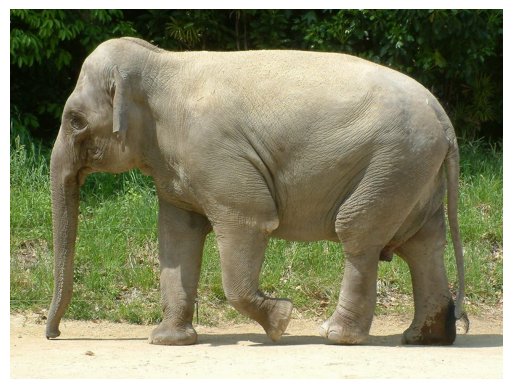

Tamaño de la imagen: (600, 800, 3)
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Prediction:
Indian_elephant: 0.7194
African_elephant: 0.2414
tusker: 0.0363


In [24]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image

# (Opcional) descargar una imagen de elefante
!wget -q https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O african_elephant.jpg

# ---- Cargar y mostrar la imagen ----
img_path = 'african_elephant.jpg'

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

print("Tamaño de la imagen:", img.shape)

# ---- Cargar el modelo VGG16 con pesos de ImageNet ----
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()   # opcional

# ---- Preprocesar la imagen para VGG16 ----
img_vgg = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img_vgg)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

# ---- Predicción ----
features = model.predict(x)

preds = keras.applications.vgg16.decode_predictions(features, top=3)[0]
print("Prediction:")
for clase_id, nombre, prob in preds:
    print(f"{nombre}: {prob:.4f}")